# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Load and Transform Dataset

In [2]:
campaign_description = pd.read_csv("campaign_descriptions.csv")
campaigns = pd.read_csv("campaigns.csv")
demographics = pd.read_csv("demographics.csv")
transaction = pd.read_csv("transactions.csv")
product = pd.read_csv("products.csv")
promotions = pd.read_csv("promotions.csv")

In [3]:
print(promotions.shape)
print(transaction.shape)
print(campaign_description.shape)
print(campaigns.shape)
print(demographics.shape)
print(product.shape)

(12019567, 5)
(1469307, 11)
(27, 4)
(6589, 2)
(801, 8)
(92331, 7)


In [4]:
df = pd.merge(transaction, product, on = "product_id", how= "left")

In [5]:
df = pd.merge(df, promotions, on = ["product_id","week","store_id"], how = "left")

In [6]:
df = pd.merge(df, demographics, on = "household_id", how = "left")

In [7]:
df1 = pd.merge(campaigns, campaign_description, on = "campaign_id", how= "left")

In [8]:
df = pd.merge(df, df1, on = "household_id", how = "left")

### All Features

In [9]:
df.head()

,household_id,store_id,basket_id,product_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size,display_location,mailer_location,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,campaign_id,campaign_type,start_date,end_date
0,900,330,3.119857e+10,1095275.0,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,13.0,Type A,2017-08-08,2017-09-24
1,900,330,3.119857e+10,1095275.0,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,16.0,Type B,2017-10-04,2017-11-05
2,900,330,3.119857e+10,1095275.0,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,18.0,Type A,2017-10-30,2017-12-24
3,900,330,3.119857e+10,1095275.0,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,22.0,Type B,2017-12-06,2018-01-07
4,900,330,3.119857e+10,1095275.0,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,NaN,NaN,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,5.0,Type B,2017-04-03,2017-05-07


Top 5 rows of Dataset

In [10]:
df.shape

(7477845, 30)

In the dataset, we have 7477845 rows and 30 columns

In [11]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In the dataset, we have int, float, object dtype features

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477845 entries, 0 to 7477844
Data columns (total 30 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   household_id           int64  
 1   store_id               int64  
 2   basket_id              float64
 3   product_id             float64
 4   quantity               int64  
 5   sales_value            float64
 6   retail_disc            float64
 7   coupon_disc            float64
 8   coupon_match_disc      float64
 9   week                   int64  
 10  transaction_timestamp  object 
 11  manufacturer_id        float64
 12  department             object 
 13  brand                  object 
 14  product_category       object 
 15  product_type           object 
 16  package_size           object 
 17  display_location       object 
 18  mailer_location        object 
 19  age                    object 
 20  income                 object 
 21  home_ownership         object 
 22  marital_status    

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
household_id,7477845.0,1.303863e+03,7.345773e+02,1.000000e+00,6.950000e+02,1.318000e+03,1.962000e+03,2.500000e+03
store_id,7477845.0,3.471577e+03,9.403851e+03,2.000000e+00,3.330000e+02,3.740000e+02,4.240000e+02,3.428000e+04
basket_id,7477845.0,3.527567e+10,3.536726e+09,3.119844e+10,3.249346e+10,3.382435e+10,4.012735e+10,4.148128e+10
product_id,7477845.0,3.118612e+06,4.073674e+06,2.567100e+04,9.200020e+05,1.030398e+06,1.139184e+06,1.795946e+07
quantity,7477845.0,1.128492e+02,1.232904e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.963800e+04
sales_value,7477845.0,3.145776e+00,4.268241e+00,0.000000e+00,1.290000e+00,2.060000e+00,3.490000e+00,8.400000e+02
retail_disc,7477845.0,5.305587e-01,1.223651e+00,0.000000e+00,0.000000e+00,4.000000e-02,6.600000e-01,1.300200e+02
coupon_disc,7477845.0,2.033108e-02,2.501188e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.593000e+01
coupon_match_disc,7477845.0,3.568235e-03,4.471046e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.700000e+00
week,7477845.0,2.682929e+01,1.507525e+01,1.000000e+00,1.400000e+01,2.600000e+01,4.000000e+01,5.300000e+01


Descriptive Statistics

# Data Cleaning

In [14]:
df.drop(columns = ["store_id", "basket_id", "product_id"], inplace = True)

Firstly I have drop store_id, basket_id and product_id because they all are unique and not needed in the analysis

In [15]:
df.duplicated().sum()

351053

In the dataset, we have 351053 duplicate rows

In [16]:
df.drop_duplicates(keep='first', inplace = True)

Here we drop the duplicate rows

In [17]:
df.shape

(7126792, 27)

In [18]:
df.isnull().sum()

household_id                   0
quantity                       0
sales_value                    0
retail_disc                    0
coupon_disc                    0
coupon_match_disc              0
week                           0
transaction_timestamp          0
manufacturer_id            28582
department                 28582
brand                      28582
product_category           39445
product_type               35486
package_size             1316980
display_location         6199001
mailer_location          6199001
age                      2448395
income                   2448395
home_ownership           3618799
marital_status           3286251
household_size           2448395
household_comp           2448395
kids_count               2448395
campaign_id               161789
campaign_type             161789
start_date                161789
end_date                  161789
dtype: int64

In [19]:
for i in df.columns:
  if df[i].isnull().sum() > 0 and df[i].dtype == "O":
    df[i].fillna(df[i].value_counts().keys()[0], inplace = True)


Here we fill null feature of object datatype with mode of that columns

In [20]:
df["campaign_id"].fillna(df["campaign_id"].value_counts().keys()[0], inplace = True)

In [21]:
df["manufacturer_id"].fillna(df["manufacturer_id"].mean(), inplace =  True)

Here we fill null values with mean of columns

In [22]:
df['Date'] = pd.to_datetime(df['transaction_timestamp']).dt.date

In [23]:
df.head()

,household_id,quantity,sales_value,retail_disc,coupon_disc,coupon_match_disc,week,transaction_timestamp,manufacturer_id,department,brand,product_category,product_type,package_size,display_location,mailer_location,age,income,home_ownership,marital_status,household_size,household_comp,kids_count,campaign_id,campaign_type,start_date,end_date,Date
0,900,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,0,A,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,13.0,Type A,2017-08-08,2017-09-24,2017-01-01
1,900,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,0,A,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,16.0,Type B,2017-10-04,2017-11-05,2017-01-01
2,900,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,0,A,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,18.0,Type A,2017-10-30,2017-12-24,2017-01-01
3,900,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,0,A,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,22.0,Type B,2017-12-06,2018-01-07,2017-01-01
4,900,1,0.5,0.0,0.0,0.0,1,2017-01-01T11:53:26Z,2.0,PASTRY,National,ROLLS,ROLLS: BAGELS,4 OZ,0,A,35-44,35-49K,Homeowner,Married,2,2 Adults No Kids,0,5.0,Type B,2017-04-03,2017-05-07,2017-01-01


# RFM Segmentation of Customers

Recency: How recently has the customer made a transaction with us

Frequency: How frequent is the customer in ordering/buying some product from us

Monetary: How much does the customer spend on purchasing products from us.

# Calculate Recency

In [24]:
df_recency = df.groupby(by='household_id',as_index=False)['Date'].max()

df_recency.columns = ['CustomerName', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)
df_recency.head()

,CustomerName,LastPurchaseDate,Recency
0,1,2017-12-31,1
1,2,2017-12-04,28
2,3,2017-12-22,10
3,4,2017-12-10,22
4,5,2017-11-02,60


# Calculate Frequency

In [25]:
frequency_df = df.drop_duplicates().groupby(by=['household_id'], as_index=False)['Date'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,1,7760
1,2,351
2,3,1017
3,4,110
4,5,80


# Calculate Monetary

In [26]:
df['Total_sales'] = (df['sales_value']-df["retail_disc"]-df['coupon_disc'])*df['quantity']
monetary_df = df.groupby(by='household_id', as_index=False)['Total_sales'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,1,18672.80
1,2,950.16
2,3,407461.86
3,4,553.10
4,5,271.77


# Merging all three columns in one dataframe

In [27]:
rfm_df = pd.DataFrame()
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(columns='LastPurchaseDate')
rfm_df.head(10)

,CustomerName,Recency,Frequency,Monetary
0,1,1,7760,18672.80
1,2,28,351,950.16
2,3,10,1017,407461.86
3,4,22,110,553.10
4,5,60,80,271.77
5,6,0,3928,11708745.76
6,7,5,2800,7667.60
7,8,3,10270,4166564.30
8,9,4,166,554.86
9,10,152,5,22.15


# Ranking Customer’s based upon their recency, frequency, and monetary score

In [28]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,1,1,7760,18672.80,89.757302,89.064399,89.064399
1,2,28,351,950.16,18.901687,40.360470,40.360470
2,3,10,1017,407461.86,39.469354,56.014581,56.014581
3,4,22,110,553.10,22.830111,19.481571,19.481571
4,5,60,80,271.77,9.070341,14.702309,14.702309


# Calculate RFM Score

In [29]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,1,4.46
1,2,1.86
2,3,2.68
3,4,1.00
4,5,0.69
5,6,4.04
6,7,3.46


# Rating Customer based upon the RFM score
rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [30]:
import numpy as np
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(10)

,CustomerName,RFM_Score,Customer_segment
0,1,4.46,High value Customer
1,2,1.86,Low Value Customers
2,3,2.68,Low Value Customers
3,4,1.00,Lost Customers
4,5,0.69,Lost Customers
5,6,4.04,High value Customer
6,7,3.46,Medium Value Customer
7,8,4.43,High value Customer
8,9,1.54,Lost Customers
9,10,0.06,Lost Customers


# Pie chart of customer segmentation

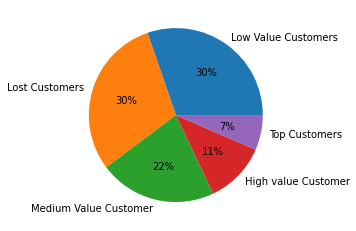

In [31]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

# Done By Tushar Sonp